# **Klasifikasi Kondisi Air Kolam Bioflok Dengan Decision Tree** 

Kolam bioflok merupakan teknologi dalam bidang akuakultur yang sedang berkembang saat ini karena dapat memberikan beberapa manfaat bagi para pembudidaya ikan. Dalam budidaya ikan tidak terlepas dari fungsi air yang memegang peranan penting bagi keberlangsungan hidup ikan, sehingga kondisi air didalam kolam seperti pH, amonia dan larutan oksigen harus terus dipantau secara teratur.

Selain mengukur kondisi air, hal lain yang tentu penting adalah mengklasifikasikan kondisi air di dalam kolam. Melakukan klasifikasi berfungsi untuk mengetahui kondisi air seperti apa yang baik untuk budidaya ikan nila.

**Tujuan Klasifikasi**
1. Mengetahui status dari kondisi air
2. Mengetahui *accuracy*, *precision*, *recall*, dan *f1-score*

**Penjelasan Data Kondisi Air**
1. Jumlah keseluruhan Data adalah 1716 Baris dengan 7 kolom.
2. Terdapat 6 parameter yang terdiri dari pH, o2, amonia, date(tanggal), Pakan, Kematian dan 1 target yaitu status.

## **Persiapan Library**

Untuk library yang digunakan adalah sebagai berikut:
1. pandas digunakan untuk mengakses data kondisi air.
2. numpy digunakan untuk melakukan perhitungan numerik.
3. matplotlib digunakan untuk visualisasi data.
4. library sklearn untuk melakukan *splitting data*, klasifikasi dengan *decision tree*, menentukan *confusion matrix*, menentukan *classification   report*
5. library graphviz untuk menampilkan plot *decision tree*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

## **Import Dataset**

untuk dataset berisi hasil pembacaan sensor pH(KIT E-201C), sensor amonia(MQ-137), dan sensor *dissolved oxygen*. Selain itu dataset juga berisi date(tanggal) dengan range pengambilan setiap 30 menit yang dimulai dari tanggal 20 September hingga 08 Oktober. Di dalam dataset juga terdapat jenis pakan, jumlah kematian ikan dan status air yang dibagi lagi menjadi 3 yaitu Baik, Buruk, dan Sedang. Import dataset menggunakan pandas dengan tipe data excel.

In [2]:
raw = pd.read_excel('dataset.xlsx')

In [3]:
raw

,pH,o2,amonia,date,Pakan,Kematian,status
0,4.15,1,0.01,2023-10-08 10:00:10,0,0 Ekor,Buruk
1,4.01,1,0.01,2023-10-08 09:30:10,0,0 Ekor,Buruk
2,4.05,1,0.02,2023-10-08 09:00:11,0,0 Ekor,Buruk
3,4.29,2,0.01,2023-10-08 08:30:11,0,0 Ekor,Buruk
4,4.47,1,0.01,2023-10-08 08:00:11,0,0 Ekor,Buruk
...,...,...,...,...,...,...,...
1711,6.06,4,0.01,2023-09-20 10:00:06,Sabas - 3,2 Ekor,Baik
1712,5.96,4,0.01,2023-09-20 09:30:06,Sabas - 3,2 Ekor,Sedang
1713,5.77,4,0.01,2023-09-20 09:00:05,Sabas - 3,2 Ekor,Sedang
1714,5.79,4,0.01,2023-09-20 08:30:05,Sabas - 3,2 Ekor,Sedang


## **Data Transformation**

*Data transformation* merupakan proses merubah struktur, format, atau nilai pada sebuah data. Pada kasus kali ini, tipe *data transformation* yang digunakan adalah *feature selection* sehingga hanya ada beberapa fitur saja yang digunakan pada klasifikasi seperti pH, amonia, dan o2 (oksigen) dan fitur yang lain yang tidak mempengaruhi klasifikasi akan dihilangkan.

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        1716 non-null   float64
 1   o2        1716 non-null   int64  
 2   amonia    1716 non-null   float64
 3   date      1716 non-null   object 
 4   Pakan     1716 non-null   object 
 5   Kematian  1716 non-null   object 
 6   status    1716 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 94.0+ KB


In [5]:
air = raw.drop(columns=['date', 'Pakan', 'Kematian'])

In [6]:
air

,pH,o2,amonia,status
0,4.15,1,0.01,Buruk
1,4.01,1,0.01,Buruk
2,4.05,1,0.02,Buruk
3,4.29,2,0.01,Buruk
4,4.47,1,0.01,Buruk
...,...,...,...,...
1711,6.06,4,0.01,Baik
1712,5.96,4,0.01,Sedang
1713,5.77,4,0.01,Sedang
1714,5.79,4,0.01,Sedang


## **Memisahkan fitur dan target**

Fitur berisi parameter yang terdapat pada dataset dan target berisi kelas atau pada dataset disebut dengan status. Fitur diwakili dengan variabel x dan target diwakili dengan variabel y

In [7]:
fitur = ['pH', 'o2', 'amonia']
x = air[fitur]
y = air['status']

In [8]:
x

,pH,o2,amonia
0,4.15,1,0.01
1,4.01,1,0.01
2,4.05,1,0.02
3,4.29,2,0.01
4,4.47,1,0.01
...,...,...,...
1711,6.06,4,0.01
1712,5.96,4,0.01
1713,5.77,4,0.01
1714,5.79,4,0.01


In [9]:
y

0        Buruk
1        Buruk
2        Buruk
3        Buruk
4        Buruk
         ...  
1711      Baik
1712    Sedang
1713    Sedang
1714    Sedang
1715    Sedang
Name: status, Length: 1716, dtype: object

## **Melakukan Splitting Data**

Splitting data berfungsi untuk memisahkan *train data* dan *test data* dengan perbandingan 20% untuk *test data* dan 80% untuk *train data*

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

In [11]:
x_train.shape, x_test.shape

((1372, 3), (344, 3))

In [12]:
klas = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=97)

klas.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=97)

In [13]:
y_pred = klas.predict(x_test)

In [14]:
y_pred_dt = klas.predict(x_train)

y_pred_dt

array(['Sedang', 'Sedang', 'Buruk', ..., 'Buruk', 'Buruk', 'Sedang'],
      dtype=object)

**Klasifikasi menggunakan Data Train**

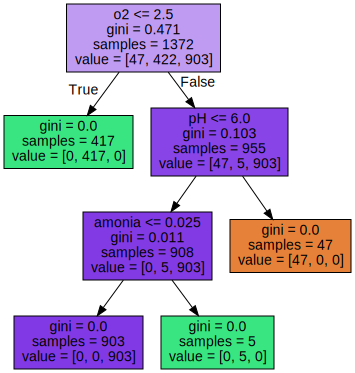

In [15]:
plot_data = tree.export_graphviz(klas, out_file=None,
                                feature_names=x_train.columns,
                                filled=True)
# Draw graph
graph = graphviz.Source(plot_data, format="png")
graph

**Export Gambar Plot**

In [16]:
graph = pydotplus.graph_from_dot_data(plot_data)
Image(graph.create_png())
graph.write_png('FinalDT.png')

True

## **Confusion Matrix**

In [17]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 15   0   0]
 [  0  81   0]
 [  1   0 247]]


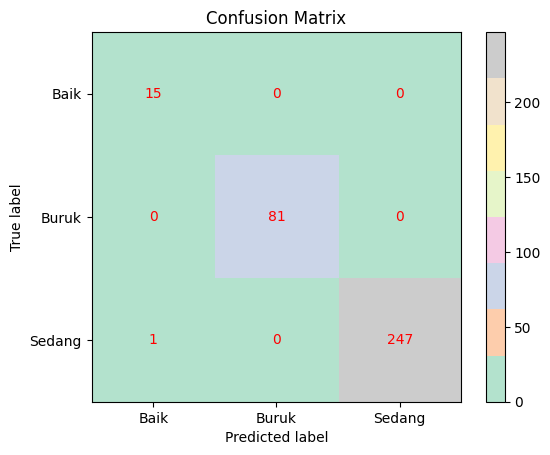

In [18]:
labels = ['Baik', 'Buruk', 'Sedang']

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Pastel2')

# Tambahkan teks pada setiap kotak
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="r")

# Tambahkan judul, label sumbu x, dan label sumbu y
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Tampilkan colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Tampilkan plot
plt.show()

**

In [19]:
tp = {}
tn = {}
fp = {}
fn = {}
for i in range(len(cm)):
    tp[i] = cm[i,i]
    tn[i] = sum(sum(cm)) - (sum(cm[i,:]) + sum(cm[:,i]) - cm[i,i])
    fp[i] = sum(cm[:,i]) - cm[i,i]
    fn[i] = sum(cm[i,:]) - cm[i,i]

print('True Positive per class:', tp)
print('True Negative per class:', tn)
print('False Positive per class:', fp)
print('False Negative per class:', fn)

True Positive per class: {0: 15, 1: 81, 2: 247}
True Negative per class: {0: 328, 1: 263, 2: 96}
False Positive per class: {0: 1, 1: 0, 2: 0}
False Negative per class: {0: 0, 1: 0, 2: 1}


## **Classification Report**

In [20]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

        Baik       0.94      1.00      0.97        15
       Buruk       1.00      1.00      1.00        81
      Sedang       1.00      1.00      1.00       248

    accuracy                           1.00       344
   macro avg       0.98      1.00      0.99       344
weighted avg       1.00      1.00      1.00       344



In [21]:
akurasi = accuracy_score(y_test, y_pred)
akurasi

0.997093023255814

In [22]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_dt)))

Model accuracy score with criterion gini index: 0.9971
Training-set accuracy score: 1.0000


In [23]:
precision = precision_score(y_test, y_pred, average='macro')

In [24]:
precision

0.9791666666666666

In [25]:
recall = recall_score(y_test, y_pred, average='macro')

In [26]:
recall

0.9986559139784946

In [27]:
f1 = f1_score(y_test, y_pred, average='macro')

In [28]:
f1

0.9885739111545563

## **PENGUJIAN KLASIFIKASI DENGAN RANDOM DATA**

**1. Pengujian Baik**
pengujian menggunakan nilai pH = 7, nilai o2 = 4, dan nilai amonia = 0.01

In [29]:
uji = klas.predict([[7, 4, 0.01]])

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
uji

array(['Baik'], dtype=object)

**2. Pengujian Sedang**
pengujian menggunakan nilai pH = 5, nilai o2 = 5, dan nilai amonia = 0.01

In [31]:
uji = klas.predict([[5, 5, 0.01]])

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
uji

array(['Sedang'], dtype=object)

**3. Pengujian Buruk**
pengujian menggunakan nilai pH = 2, nilai o2 = 1, dan nilai amonia = 1

In [33]:
uji = klas.predict([[2, 1, 1]])

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
uji

array(['Buruk'], dtype=object)

## **PENGUJIAN MODEL DENGAN DATASET BARU**

In [35]:
dataset_baru = pd.read_excel("dataUji.xlsx")

In [36]:
dataset_baru

,pH,o2,amonia,date,Pakan,Kematian
0,4.76,3,0.01,2023-10-02 01:53:08,0,0 Ekor
1,4.73,3,0.01,2023-10-02 01:54:09,0,0 Ekor
2,5.87,4,0.01,2023-10-02 05:40:49,0,0 Ekor
3,4.75,2,0.01,2023-10-02 07:01:09,0,0 Ekor
4,4.70,2,0.01,2023-10-02 07:02:09,0,0 Ekor
5,5.63,2,0.01,2023-10-03 13:11:09,0,0 Ekor
6,4.63,2,0.01,2023-10-03 13:12:09,0,0 Ekor
7,5.46,2,0.01,2023-10-03 13:13:09,0,0 Ekor
8,5.22,2,0.01,2023-10-03 13:14:09,0,0 Ekor
9,4.60,2,0.01,2023-10-03 13:15:09,0,0 Ekor


In [37]:
dataset_uji = dataset_baru.drop(columns=['date', 'Pakan', 'Kematian'])

In [38]:
uji_1 = klas.predict(dataset_uji)

In [39]:
uji_1

array(['Sedang', 'Sedang', 'Sedang', 'Buruk', 'Buruk', 'Buruk', 'Buruk',
       'Buruk', 'Buruk', 'Buruk', 'Buruk', 'Buruk', 'Buruk', 'Buruk',
       'Buruk', 'Buruk', 'Buruk', 'Buruk', 'Sedang', 'Buruk'],
      dtype=object)